<a href="https://colab.research.google.com/github/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/blob/2ndbranch/EDA%2Bregression%2Bsprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading dataset

In [0]:
rider= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Riders.csv')
rider.columns= [col.replace(' ', '_') for col in rider.columns]
rider.head()

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [0]:
train= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Train.csv')
train.columns= [col.replace(' ', '_') for col in train.columns]
train.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [0]:
test= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Test.csv')
test.columns= [col.replace(' ', '_') for col in test.columns]
test.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [0]:
sample_submission= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/SampleSubmission.csv')
sample_submission.columns= [col.replace(' ', '_') for col in sample_submission.columns]
sample_submission.head()

,Order_No,Time_from_Pickup_to_Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


Missing Values

In [0]:
train_missing=train.isnull().sum() * 100 / len(train)
train_missing=train_missing.drop(train_missing[train_missing==0].index).sort_values(ascending=False)
missing_data=round(pd.DataFrame({'Missing Percentage':train_missing}),2)
missing_data

,Missing Percentage
Precipitation_in_millimeters,97.40
Temperature,20.59


In [0]:
test_missing=test.isnull().sum() * 100 / len(test)
test_missing=test_missing.drop(test_missing[test_missing==0].index).sort_values(ascending=False)
missing_data=round(pd.DataFrame({'Missing Percentage':test_missing}),2)
missing_data

,Missing Percentage
Precipitation_in_millimeters,97.18
Temperature,20.33


Summary Statistics

In [0]:
train.describe()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


**Observations**



*   For the distance the median or value at 50th percentile is higher than the 
mean.
*   There is also a large difference between the max value and that of the 75th percentile, these 2 points could be an indication of a presence of outliers in the dataset.

*   The precipitation in millimeters column has missing values accounting for about 97% of the data, the mean and median of the column are more or less the same, therefore the missing values can be imputed with either. Imputation with either the mean or median value could affect the distribution of the data.


Correlation

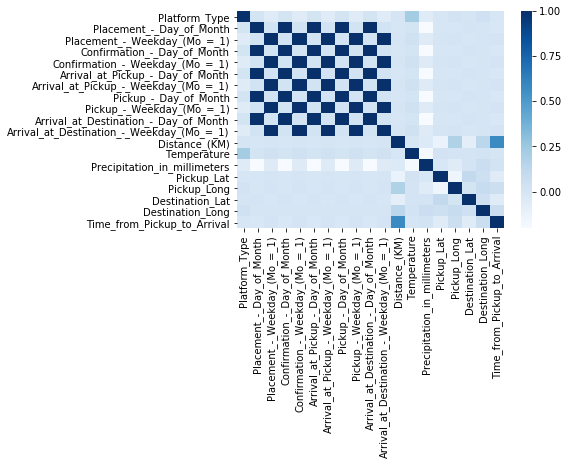

In [0]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),cmap='Blues',annot=False) 

**Observations**

*   The dependent variable is the most correlated with distance.
The columns for placement,confirmation,arrival at pickup (day of the month and weekday) are most correlated with each other. This attribute could pose a problem with multicollinearity when training the model.
*   Intuitively we expect to see high correlation between distance and the latitude and longitude columns, however, the correlation is not high. We may have to introduce normalization or standardization to the dataset, and we may have to select variables on the basis of minimal collinearity.


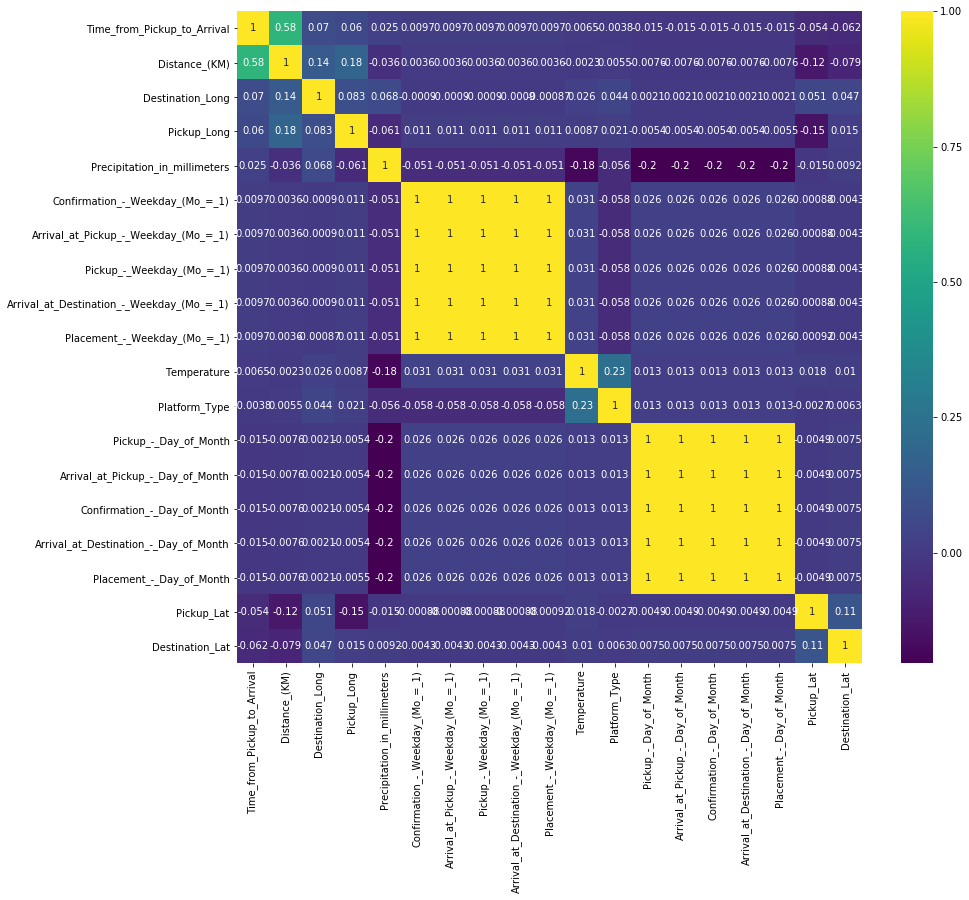

In [0]:

k = 19 #number of variables for heatmap
cols = train.corr().nlargest(k, 'Time_from_Pickup_to_Arrival')['Time_from_Pickup_to_Arrival'].index
cm = train[cols].corr()
plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [0]:
num_cols=['Distance_(KM)','Temperature', 'Precipitation_in_millimeters']

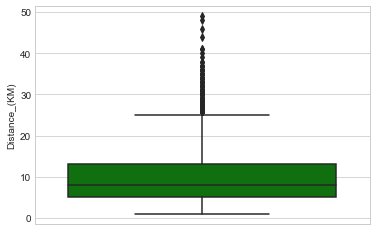

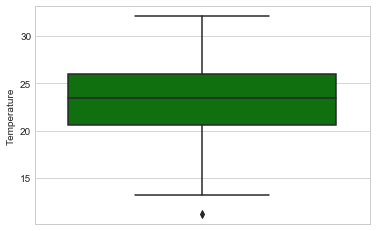

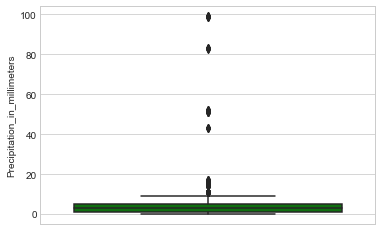

In [0]:
for col in num_cols:
    sns.set_style('whitegrid')
    sns.boxplot(train[col],color='green',orient='v')
    plt.show()

**Observations**
 

*  Distance has quite a number of outlier values, these may have an effect on the model since distance has shown to have the highest correlation with the dependent variable
*   The precipitation column also has outlier values, however, the distibution of the data is highly affected by the number of missing values.


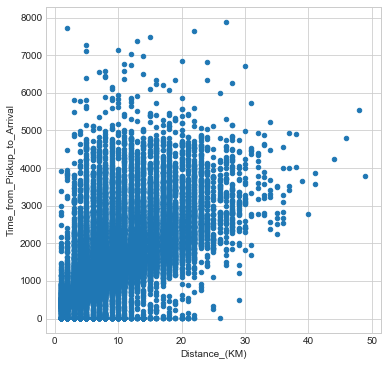

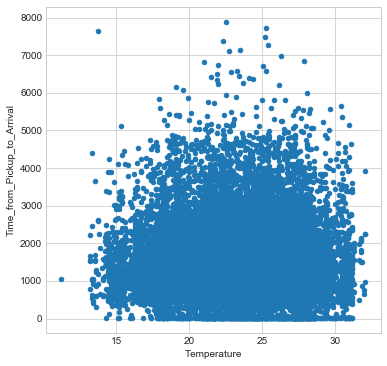

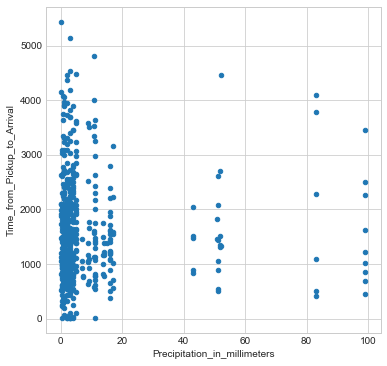

In [0]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    train.plot.scatter(x = col, y = 'Time_from_Pickup_to_Arrival', ax = ax)
    plt.show()

**Observations**


*   Precipitation is clustered around certain points, we could create a new feature column to capture the clusters


ValueError: max must be larger than min in range parameter.

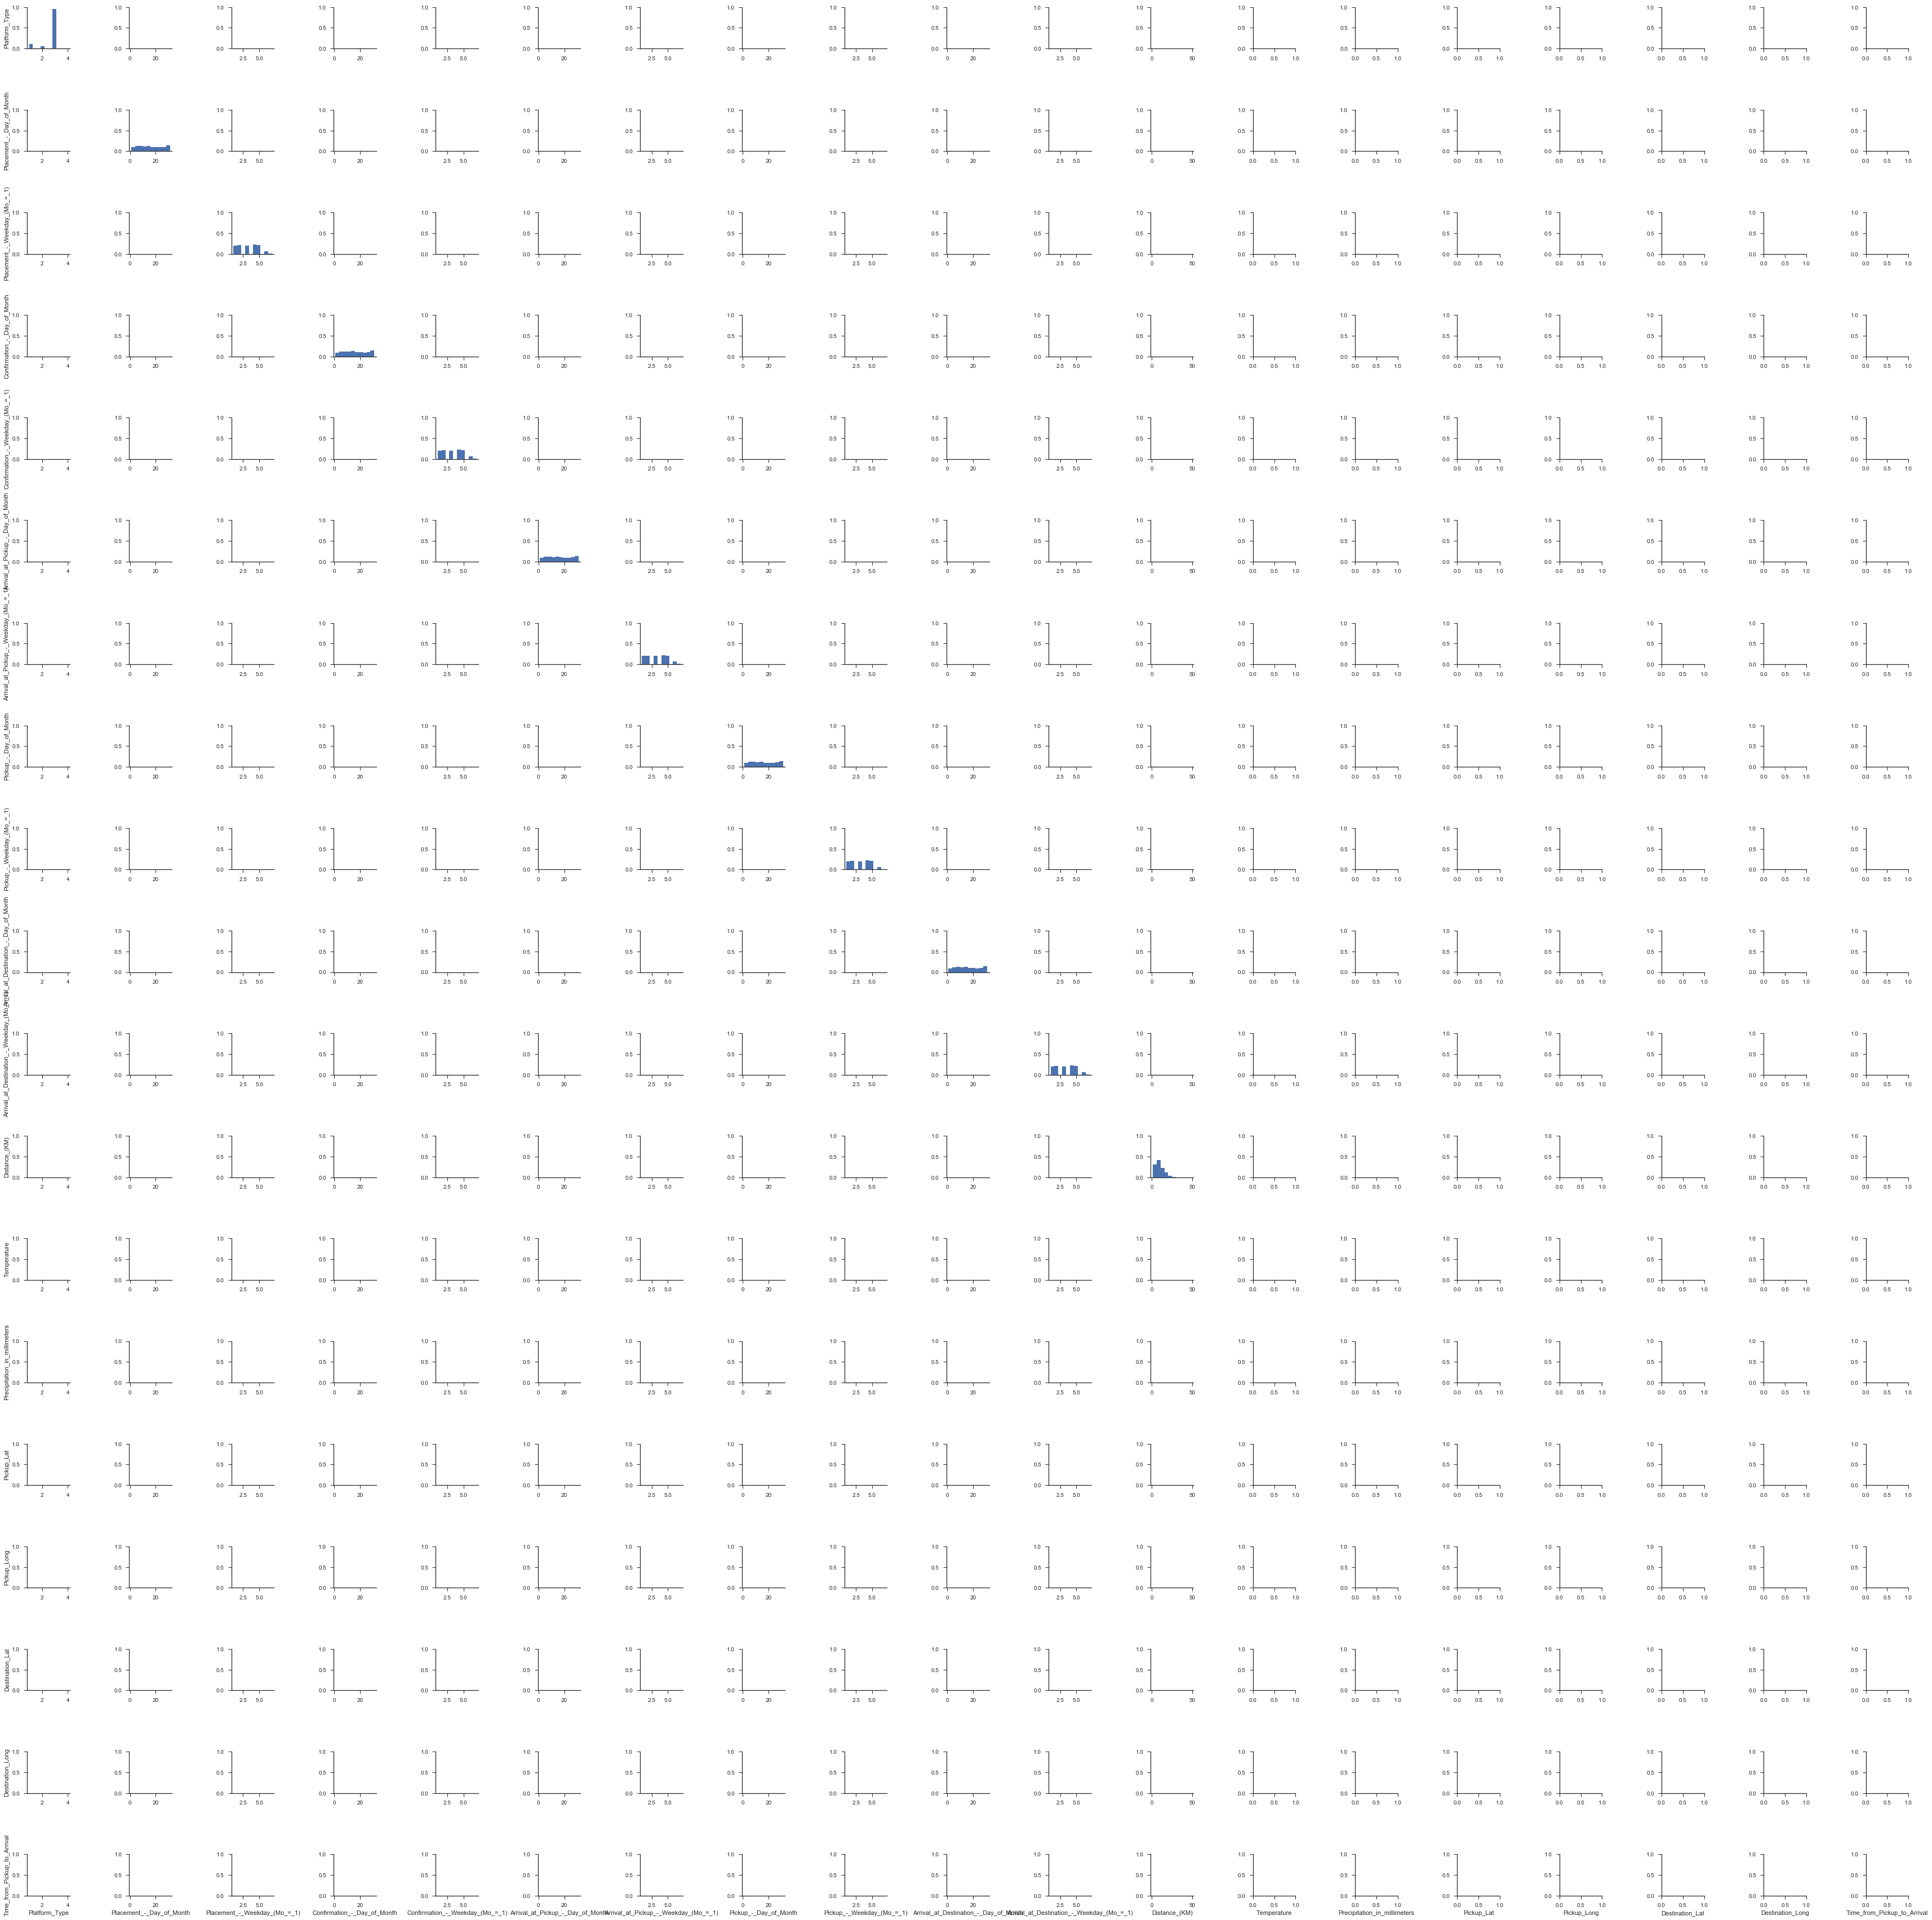

In [0]:
sns.pairplot(train)